### Project Overview
- Your goal is to evaluate every stock in the s&P500, and Nasdaq Adj Close as well as the daily return
- You will look for companies who too a dip (Loss for the day) as  well as companies that have spiked for the today's close

## Project approach:
- Use pandas data reader to get all Adj Close data for each stock for the year 2020 
- Will import all securities form a past project that passed properly through pandas data reader 
- Add all of resuts to a data frame
- Calculate the Daily return for each stock as well as the volitility year to date
- group Dips and Spikes - Which are worthy of investing

In [1]:
import pandas as pd 
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
tickers = pd.read_csv("resources/passed_Tickers.csv", index_col='Unnamed: 0')

In [3]:
tickers = list(tickers["Tickers"].values)

## Fetching the data 
 - we need ot consider companies that myay no longer exist and or have failed 
 - We also need to store the failed companies for future use

In [4]:
data = pd.DataFrame()

In [5]:
failed = []
passed = []
for x in tickers:
    try:
        data[x] = web.DataReader(x, data_source= "yahoo", start = "2020-1-1")["Adj Close"]
        passed.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        failed.append(x)

## Taking A Look at Arconic and the companies Coorelated Year to Date

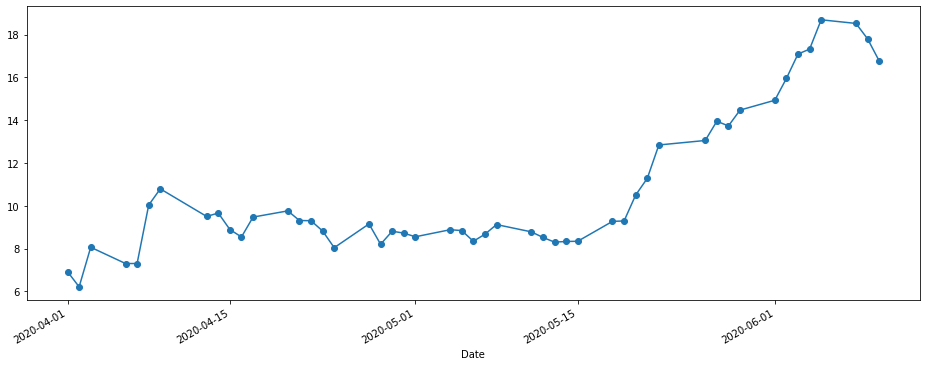

In [6]:
data["ARNC"].plot(figsize = (16,6), marker = "o")

### Passed Companies Passed 
- 471 companies passed the yahoo finance 

In [7]:
len(passed)

471

## Corr to Arconic
- Below are the top 20 companies coorelated to arconic 

In [8]:
data.corrwith(data["ARNC"]).sort_values(ascending = False).head(20)

ARNC    1.000000
RTN     1.000000
ALB     0.965220
PPG     0.956880
TDG     0.950894
GRMN    0.950628
ETFC    0.947979
MS      0.947340
MTD     0.946135
F       0.943623
GD      0.943208
VTR     0.939709
NKE     0.938766
GM      0.938623
LB      0.935507
DISH    0.933778
GPS     0.932035
ABC     0.931574
XRAY    0.931544
EL      0.931263
dtype: float64

## Daily Returns for each Stock
- We will focus on todays closing only to see which companies Dip or spikes

In [9]:
returns_df = pd.DataFrame()
for x in passed:
    data[f"{x} daily return"] = data[f"{x}"].pct_change()
    returns_df[f"{x}"] = data[f"{x}"].pct_change()

## Analysis of todays close - Spikes
- top 20 companies that had the highest daily returns at close

In [47]:
todaysdate = returns_df.tail()[-1:].iloc[0].name

In [48]:
returns_df.transpose()[todaysdate].sort_values(ascending = False).head(20)

APTV    0.067580
IDXX    0.061584
CRM     0.043767
MSFT    0.037092
NVDA    0.035458
RMD     0.031519
EA      0.031387
AAPL    0.027908
NEM     0.027287
ADBE    0.026627
CLX     0.026228
ATVI    0.025417
ABT     0.023374
DG      0.022604
TTWO    0.021576
PCG     0.021169
AMD     0.020885
GPN     0.020491
PYPL    0.019444
DHR     0.019416
Name: 2020-06-10 00:00:00, dtype: float64

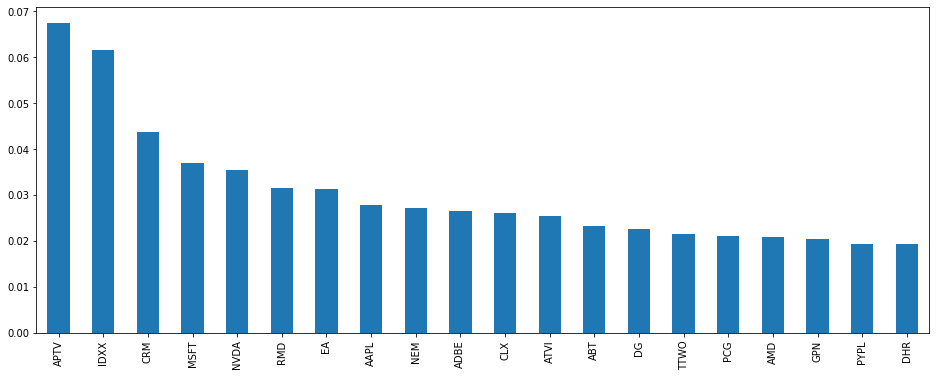

In [49]:
returns_df.transpose()[todaysdate].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = (16,6))

### Dips 
- top 20 companies that had the lowest daily returns fot todays close

In [50]:
returns_df.transpose()[todaysdate].sort_values(ascending = True).head(20)

NCLH   -0.144219
GPS    -0.112670
MAC    -0.110368
UAL    -0.110215
ADS    -0.107385
KSS    -0.107196
CCL    -0.106771
M      -0.105975
OXY    -0.104616
APA    -0.099516
ALK    -0.099349
RCL    -0.090402
WFC    -0.089488
NBL    -0.087436
COTY   -0.086879
RRC    -0.086093
CMA    -0.085430
AAL    -0.083008
COF    -0.082197
TXT    -0.081927
Name: 2020-06-10 00:00:00, dtype: float64

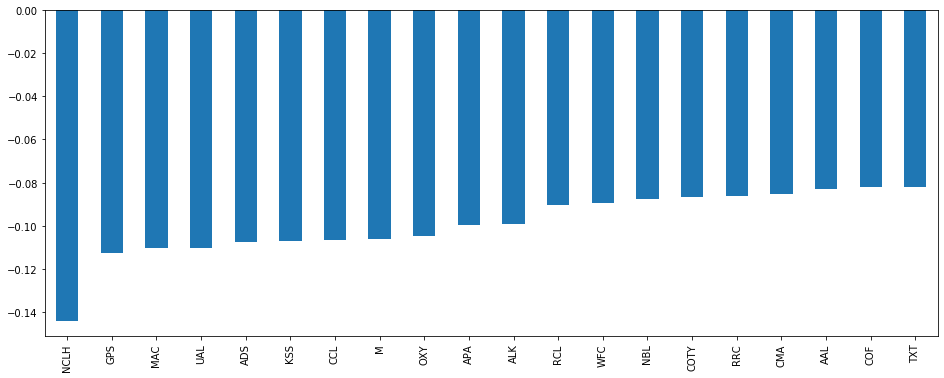

In [51]:
returns_df.transpose()[todaysdate].sort_values(ascending = True).head(20).plot(kind = "bar", figsize = (16,6))

# Nasdaq - Dips and Spikes

- Fetching Data
- we will repeat the same process for the Nasdaq

In [14]:
nasdaq = pd.DataFrame()

In [15]:
nasdaq_data = pd.read_excel("resources/nasdaq_100_stocks.xlsx")

In [16]:
nas_tickers = list(nasdaq_data["Ticker"].values)

In [17]:
nas_failed = []
nas_passed = []
for x in nas_tickers:
    try:
        nasdaq[x] = web.DataReader(x, data_source= "yahoo", start = "2020-1-1")["Adj Close"]
        nas_passed.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        nas_failed.append(x)

## Daily Returns for Nasdaq

In [18]:
nas_returns = pd.DataFrame()
for x in nas_passed:
    nasdaq[f"{x} returns"] = nasdaq[f"{x}"].pct_change()
    nas_returns[f"{x}"] = nasdaq[f"{x}"].pct_change()

### Spikes
 - Top 20 companies with the higheest daily returns

In [52]:
nas_returns.transpose()[todaysdate].sort_values(ascending = False).head(20)

TSLA    0.089702
IDXX    0.062343
NTES    0.037701
MSFT    0.037092
NVDA    0.035458
JD      0.031962
EA      0.030891
AAPL    0.025728
ATVI    0.025278
TMUS    0.025196
BMRN    0.024455
ADBE    0.024323
MELI    0.023487
LULU    0.021650
TTWO    0.021576
PYPL    0.019444
AMD     0.018620
WDAY    0.018302
AMZN    0.017913
INTU    0.015863
Name: 2020-06-10 00:00:00, dtype: float64

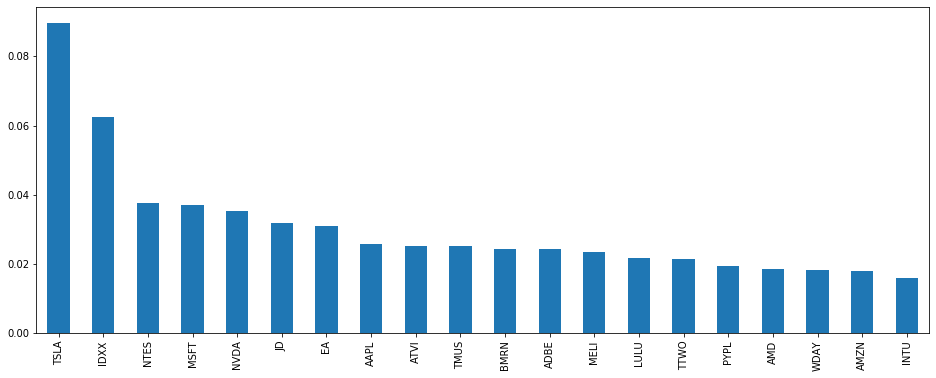

In [53]:
nas_returns.transpose()[todaysdate].sort_values(ascending = False).head(20).plot(kind = "bar", figsize = (16,6))

## Dips
- top 20 companies with the lowest daily returns for today

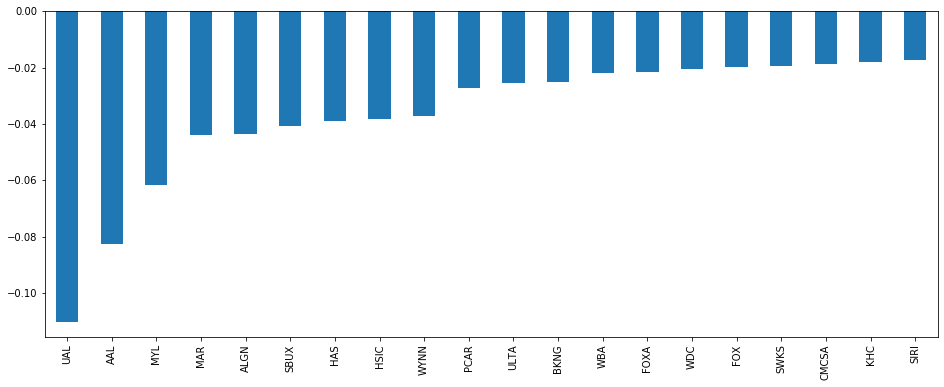

In [54]:
nas_returns.transpose()[todaysdate].sort_values(ascending = True).head(20).plot(kind = "bar", figsize = (16,6))

In [55]:
nas_returns.transpose()[todaysdate].sort_values(ascending = True).head(20)

UAL     -0.110215
AAL     -0.082480
MYL     -0.061518
MAR     -0.043794
ALGN    -0.043438
SBUX    -0.040792
HAS     -0.039010
HSIC    -0.038260
WYNN    -0.037271
PCAR    -0.027232
ULTA    -0.025625
BKNG    -0.025118
WBA     -0.022085
FOXA    -0.021746
WDC     -0.020489
FOX     -0.019782
SWKS    -0.019404
CMCSA   -0.018743
KHC     -0.018127
SIRI    -0.017378
Name: 2020-06-10 00:00:00, dtype: float64

### S&P Vol 2020

In [56]:
cols = [x for x in returns_df]

In [57]:
sandp_vol = []
for x in returns_df.columns:
    sandp_vol.append(returns_df[f"{x}"].std())

In [58]:
s_andp_volitility = pd.DataFrame(sandp_vol, index=cols, columns=["vol"])

In [59]:
s_andp_volitility.drop("EW")

,vol
MMM,0.031154
AOS,0.029934
ABT,0.032647
ABBV,0.028329
ACN,0.034579
...,...
XYL,0.038917
YUM,0.039290
ZBH,0.040300
ZION,0.040310


### Top 10 most volitile companies - S&P 2020 - year to date

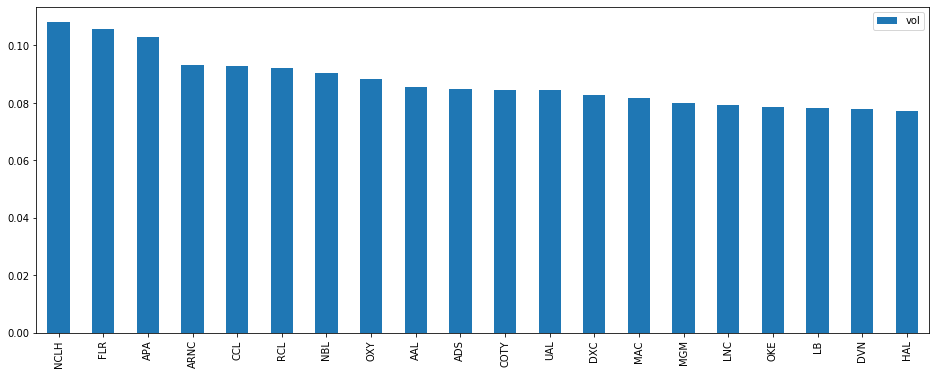

In [60]:
s_andp_volitility.drop("EW").sort_values("vol", ascending = False).head(20).plot(kind = "bar", figsize = (16,6))

### Top 10 least volitile companies - S&P 2020 - year to date

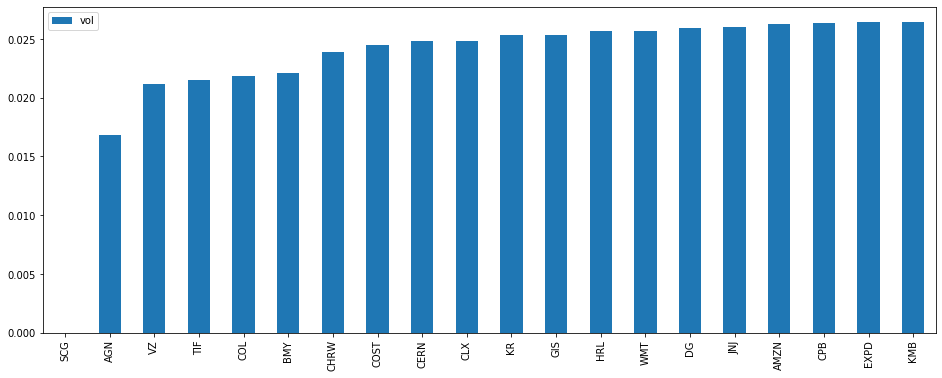

In [61]:
s_andp_volitility.sort_values("vol", ascending = True).head(20).plot(kind = "bar", figsize = (16,6))